# Importing Libraries

In [2]:
# Import basic libraries 
import os
import pandas as pd
from pandas.plotting import scatter_matrix
import numpy as np
import matplotlib.pyplot as plt
import os
from collections import Counter
import seaborn as sn


# scikit packages
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import BernoulliNB 
from sklearn import metrics


# Importing the Dataset

In [3]:
os.getcwd()

'C:\\Users\\hp\\Desktop\\Project'

In [4]:
df = pd.read_csv("creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


# Data Visualization

In [5]:
# View top 5 records
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [6]:
#viewing last 5 records
df.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0
284806,172792.0,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,217.00,0


In [7]:
# determine the number of records in the dataset
print('The dataset contains {0} rows and {1} columns.'.format(df.shape[0], df.shape[1]))

The dataset contains 284807 rows and 31 columns.


In [8]:
#Describing the Data
print(df.shape) 
print(df.describe()) 

(284807, 31)
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  3.919560e-15  5.688174e-16 -8.769071e-15  2.782312e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean  -1.552563e-15  2.010663e-15 -1.694249e-15 -1.927028e-16 -3.137024e-15   
std    1.380247e+00  1.332271

# Data Visualization

Text(0, 0.5, 'Frequency')

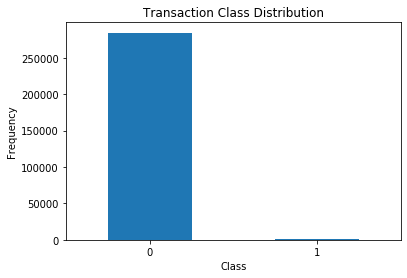

In [9]:
count_classes = pd.value_counts(df['Class'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Transaction Class Distribution")
plt.xlabel("Class")
plt.ylabel("Frequency")

In [10]:
fraud = df[df['Class']==1]

normal = df[df['Class']==0]

In [11]:
print(fraud.shape,normal.shape)

(492, 31) (284315, 31)


In [12]:
#We have to analyze more amount of information from the transaction data i.e fraud data
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [13]:
#normal data
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

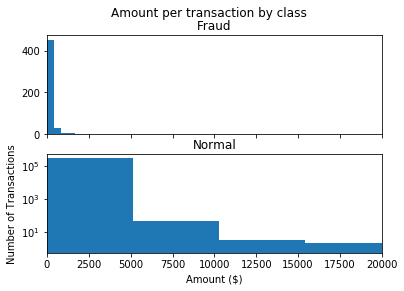

In [14]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by class')
bins = 5
ax1.hist(fraud.Amount, bins = bins)
ax1.set_title('Fraud')
ax2.hist(normal.Amount, bins = bins)
ax2.set_title('Normal')
plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.xlim((0, 20000))
plt.yscale('log')
plt.show();

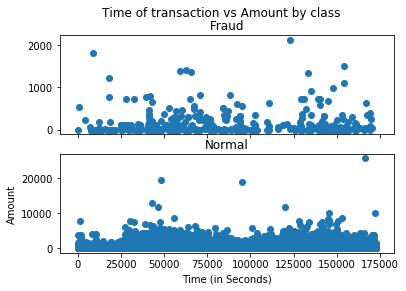

In [15]:
#here we are checking fraudulent transactions occur more often during certain time frame 
#visual representation
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Time of transaction vs Amount by class')
ax1.scatter(fraud.Time, fraud.Amount)
ax1.set_title('Fraud')
ax2.scatter(normal.Time, normal.Amount)
ax2.set_title('Normal')
plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

# Taking care of Missing Data

In [16]:
# check for missing values and data types of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [17]:
#Get a count of missing values in the dataset
df.apply(lambda x: sum(x.isnull()),axis=0)

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [18]:
df.isnull().values.any()

False

# Lable Encoding and One Hot Encoding

In [19]:
#For doing Label Encoding our dataset does not contain any textual data, so here Label Encoding is not necessary.

In [20]:
#For doing One Hot Encoding our dataset does not contains any textual data, so here One Hot Encoding is not necessary.

# Splitting the dataset

In [21]:
print('Normal transactions count: ', df['Class'].value_counts().values[0])
print('Fraudulent transactions count: ', df['Class'].value_counts().values[1])

Normal transactions count:  284315
Fraudulent transactions count:  492


In [22]:
# feature data (predictors)
X = df.iloc[:, :-1]

# label class
y = df['Class']

In [23]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,1.475829,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.059616,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.001396,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.127434,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00


In [24]:
y

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [25]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [26]:
X_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
161145,113921.0,-0.132066,0.107044,-0.650588,-0.996032,1.814333,1.740740,0.496852,0.633016,0.017181,...,-0.062612,-0.062489,0.005292,0.251519,-2.466810,-0.889690,0.337462,0.306395,0.074817,47.89
204520,135319.0,2.125994,0.014207,-1.514760,0.115021,0.598510,-0.333235,0.199289,-0.264353,0.384111,...,-0.086076,-0.329368,-0.788150,0.267730,0.066122,-0.135785,0.203841,-0.068267,-0.057678,1.98
182659,125498.0,-0.086694,0.166240,1.573127,0.687266,0.222359,1.102606,1.575093,-1.098608,0.763887,...,0.052960,0.015324,1.063663,-0.410841,0.722723,-0.171733,-0.613543,-1.201571,-1.139931,170.10
25117,33520.0,1.352339,-0.534984,0.555143,-0.629355,-1.144170,-0.852967,-0.642128,-0.032659,-0.654482,...,-0.066712,-0.014814,-0.180379,0.178112,0.347720,0.151810,-0.404361,0.013746,0.016152,5.96
227642,145152.0,-1.526760,0.647782,0.615391,-0.561114,0.836950,-0.514251,0.984325,-0.097430,-0.062634,...,-0.073333,-0.221533,-0.393158,-0.214990,0.588447,0.679496,0.518434,0.065022,0.147294,89.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
211543,138459.0,-1.321976,1.138686,-0.940861,0.154160,0.109802,-0.538822,0.490058,0.513762,-0.493834,...,-0.436962,-0.012778,-0.237503,0.008713,-0.767844,-0.397162,0.316379,-0.463125,-0.010589,49.89
86293,61167.0,-0.627810,0.918729,1.478453,0.213171,0.933695,1.261486,0.504752,0.404286,-0.939740,...,0.088281,-0.051356,-0.004245,0.090535,-0.964599,-0.522294,0.296733,0.145939,0.110400,24.99
122579,76616.0,1.512602,-0.949435,-0.219062,-1.638850,-0.856348,-0.465996,-0.669193,-0.135566,-2.284345,...,-0.279028,-0.558803,-1.377240,0.080444,-0.579511,0.297851,-0.495367,-0.001415,0.003665,34.90
152315,97253.0,1.798863,-1.699791,-0.142182,-0.619533,-1.570248,0.083268,-1.501980,0.176287,1.755507,...,0.146098,0.181914,0.351358,0.115638,-0.566188,-0.596200,-0.295152,-0.033616,-0.032471,171.31


In [27]:
y_train

161145    0
204520    0
182659    0
25117     0
227642    0
         ..
211543    0
86293     0
122579    0
152315    0
117952    0
Name: Class, Length: 199364, dtype: int64

In [28]:
X_test

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
183484,125821.0,-0.323334,1.057455,-0.048341,-0.607204,1.259821,-0.091761,1.159101,-0.124335,-0.174640,...,0.186409,-0.207098,-0.433890,-0.261613,-0.046651,0.211512,0.008297,0.108494,0.161139,40.00
255448,157235.0,-0.349718,0.932619,0.142992,-0.657071,1.169784,-0.733369,1.009985,-0.071069,-0.302083,...,-0.096502,-0.271537,-0.833209,-0.030360,0.490035,-0.404816,0.134350,0.076830,0.175562,1.98
244749,152471.0,-1.614711,-2.406570,0.326194,0.665520,2.369268,-1.775367,-1.139049,0.329904,0.903813,...,0.419835,0.701399,1.134489,0.965054,0.640981,-1.801998,-1.041114,0.286285,0.437322,96.00
63919,50927.0,-2.477184,0.860613,1.441850,1.051019,-1.856621,2.078384,0.510828,-0.243399,-0.260691,...,-0.987790,0.810408,0.692245,0.150121,-0.260777,0.005183,-0.177847,-0.510060,-0.660533,308.00
11475,19899.0,1.338831,-0.547264,0.737389,-0.212383,-1.110039,-0.525744,-0.801403,-0.063672,0.997276,...,-0.126871,-0.139436,-0.074719,0.067055,0.333122,0.379087,-0.268706,-0.002769,0.003272,5.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
208059,136954.0,-0.429070,0.712074,0.675855,-0.403577,0.668849,-0.413713,0.665961,0.099935,-0.379066,...,0.016809,-0.102000,-0.391487,-0.332563,-0.512572,0.746656,0.368231,-0.150931,-0.111220,29.95
260930,159780.0,-4.673996,-3.716208,-1.486611,0.829036,0.902701,-0.501887,2.994824,-1.188013,0.864683,...,-2.927002,-1.387099,0.414913,3.103269,0.642007,0.464011,0.027749,0.973848,-1.566714,533.05
75125,55911.0,-1.215390,1.379556,0.438732,1.394346,-0.377212,0.843496,-0.975098,-1.969737,-0.917814,...,0.659545,-1.230618,0.716991,0.107986,0.042642,-0.046630,-0.251591,0.234356,-0.035339,57.00
37292,38895.0,-0.632439,1.212284,1.388188,0.151509,-0.342824,-1.337771,0.648076,-0.046668,-0.103480,...,0.170883,-0.268740,-0.687707,0.082524,0.838322,-0.207461,0.046706,0.345269,0.168419,7.15


In [29]:
y_test

183484    0
255448    0
244749    0
63919     0
11475     0
         ..
208059    0
260930    0
75125     0
37292     0
240913    0
Name: Class, Length: 85443, dtype: int64

# Feature Scaling

In [30]:
#from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing 
x = df.iloc[:, :-1].values
y = df.iloc[:, -1].values
print ("\nOriginal data values(x) : \n",  x) 
print ("\nOriginal data values(y) : \n",  y) 
from sklearn import preprocessing 
min_max_scaler = preprocessing.MinMaxScaler(feature_range =(0, 1)) 
# Scaled feature 
x_after_min_max_scaler = min_max_scaler.fit_transform(x)
print ("\nAfter min max Scaling(x) : \n", x_after_min_max_scaler) 
Standardisation = preprocessing.StandardScaler() 
# Scaled feature 
x_after_Standardisation = Standardisation.fit_transform(x)
print ("\nAfter Standardisation(x) : \n", x_after_Standardisation)



Original data values(x) : 
 [[ 0.00000000e+00 -1.35980713e+00 -7.27811733e-02 ...  1.33558377e-01
  -2.10530535e-02  1.49620000e+02]
 [ 0.00000000e+00  1.19185711e+00  2.66150712e-01 ... -8.98309914e-03
   1.47241692e-02  2.69000000e+00]
 [ 1.00000000e+00 -1.35835406e+00 -1.34016307e+00 ... -5.53527940e-02
  -5.97518406e-02  3.78660000e+02]
 ...
 [ 1.72788000e+05  1.91956501e+00 -3.01253846e-01 ...  4.45477214e-03
  -2.65608286e-02  6.78800000e+01]
 [ 1.72788000e+05 -2.40440050e-01  5.30482513e-01 ...  1.08820735e-01
   1.04532821e-01  1.00000000e+01]
 [ 1.72792000e+05 -5.33412522e-01 -1.89733337e-01 ... -2.41530880e-03
   1.36489143e-02  2.17000000e+02]]

Original data values(y) : 
 [0 0 0 ... 0 0 0]

After min max Scaling(x) : 
 [[0.00000000e+00 9.35192337e-01 7.66490419e-01 ... 4.18976135e-01
  3.12696634e-01 5.82379309e-03]
 [0.00000000e+00 9.78541955e-01 7.70066651e-01 ... 4.16345145e-01
  3.13422663e-01 1.04705276e-04]
 [5.78730497e-06 9.35217023e-01 7.53117667e-01 ... 4.1548926

# Training and Testing the model

In [31]:
minmax=preprocessing.MinMaxScaler(feature_range=(0,1))
minmax.fit(x).transform(x)

array([[0.00000000e+00, 9.35192337e-01, 7.66490419e-01, ...,
        4.18976135e-01, 3.12696634e-01, 5.82379309e-03],
       [0.00000000e+00, 9.78541955e-01, 7.70066651e-01, ...,
        4.16345145e-01, 3.13422663e-01, 1.04705276e-04],
       [5.78730497e-06, 9.35217023e-01, 7.53117667e-01, ...,
        4.15489266e-01, 3.11911316e-01, 1.47389219e-02],
       ...,
       [9.99976851e-01, 9.90904812e-01, 7.64079694e-01, ...,
        4.16593177e-01, 3.12584864e-01, 2.64215395e-03],
       [9.99976851e-01, 9.54208999e-01, 7.72855742e-01, ...,
        4.18519535e-01, 3.15245157e-01, 3.89238944e-04],
       [1.00000000e+00, 9.49231759e-01, 7.65256401e-01, ...,
        4.16466371e-01, 3.13400843e-01, 8.44648509e-03]])

In [32]:
from sklearn import model_selection, neighbors
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [33]:
X_train

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
54572,46509.0,-2.711976,-2.595751,1.791510,-1.574456,-1.103277,0.203503,0.690305,0.079698,-0.549025,...,-0.264011,-0.466637,-1.091069,0.437861,-0.002062,0.333400,0.670391,-0.142861,0.289031,481.44
7494,10222.0,1.284018,0.163848,0.013801,-0.045354,-0.073260,-0.764919,0.075499,-0.262348,1.079273,...,-0.065623,-0.196991,-0.335543,-0.081707,0.035756,0.420097,1.003226,-0.134640,-0.022715,13.74
198973,132740.0,2.045035,0.070469,-1.947109,0.336103,0.341915,-0.978383,0.073956,-0.140879,0.569648,...,-0.264602,0.194722,0.637199,-0.077211,-0.603161,0.239689,-0.086767,-0.014711,-0.046724,4.00
279637,169002.0,2.023232,0.241609,-1.694146,0.528677,0.269844,-1.410780,0.351254,-0.435504,0.424146,...,-0.116054,0.222054,0.846649,-0.038544,-0.046616,0.269900,-0.103393,0.005351,-0.027009,16.90
167431,118680.0,-0.873838,0.474974,-1.415775,-0.484232,1.016395,-0.760008,1.889260,0.044478,-1.530959,...,0.271137,0.537073,1.012363,-0.061086,0.792703,1.023667,0.670202,-0.314630,-0.170169,193.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182943,125593.0,-0.800653,1.072119,0.553027,0.768991,1.089571,-0.135424,1.485738,-0.175636,-1.205373,...,0.010911,0.102018,0.353101,-0.579067,-0.376136,1.125618,-0.192662,-0.086891,0.053693,57.55
5605,5769.0,1.185300,1.436782,-1.317515,1.869522,1.015100,-1.480824,0.671082,-0.398425,0.682084,...,-0.067197,-0.301999,-0.446670,-0.137094,0.037761,0.747115,-0.326223,0.035756,0.092291,0.99
276586,167181.0,-0.964303,1.140395,-2.280902,-1.796716,2.092195,3.464950,0.333563,1.480568,-0.713858,...,-0.402650,0.058743,-0.146786,0.153605,0.735468,-0.715690,0.347232,-0.313833,0.030302,103.90
119361,75422.0,-2.179293,-6.107003,-1.427518,0.409213,-2.466145,0.673550,1.666469,-0.321789,1.369832,...,3.580199,1.218079,-0.272170,-1.828798,-0.379850,0.072844,-0.686943,-0.243693,0.325597,1784.51


In [34]:
y_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [35]:
X_test

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
45093,42205.0,-0.513737,2.393305,-2.120482,1.256021,1.093865,-1.248811,0.976330,-0.259902,0.444417,...,0.776037,-0.245105,0.077442,0.188242,-0.123632,-0.331012,-0.420102,0.492388,0.134105,4.49
168724,119353.0,-1.134626,-0.067462,2.846577,1.045780,-0.289027,0.262461,-0.061677,0.177473,0.520181,...,0.558759,0.256343,0.824073,-0.121654,-0.047446,0.402015,-0.291359,0.184423,-0.051005,100.00
248068,153787.0,-0.782887,0.192294,0.445848,-1.164509,-0.881126,0.120512,0.186457,0.398273,0.173283,...,0.019407,0.383800,1.065923,-0.057535,-0.360797,-0.791151,0.800496,-0.018952,0.056901,150.00
37753,39088.0,1.080593,-0.083215,0.817855,1.362274,-0.285017,0.814433,-0.440329,0.304545,0.541970,...,-0.119753,-0.042304,0.224291,-0.139400,-0.255475,0.644492,-0.258300,0.070915,0.012150,18.00
99159,66994.0,1.281367,-0.332765,-0.014984,-1.316124,-0.506724,-0.919208,0.055475,-0.288462,1.424292,...,0.056479,-0.213339,-0.334191,-0.140749,-0.027104,0.685835,-0.060378,0.011471,0.014404,35.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159355,112413.0,2.024876,-0.171537,-1.432684,0.085031,0.154632,-0.573425,-0.031919,-0.057431,0.667371,...,-0.299984,0.311875,0.958572,0.028848,0.695835,0.259733,-0.465881,-0.004759,-0.059648,1.00
140005,83481.0,-1.462790,1.783355,0.704154,0.974842,-0.521777,-0.096250,-0.107350,0.905624,-0.519969,...,0.186714,0.192599,0.733295,-0.072591,0.209814,-0.175348,-0.212846,0.224086,-0.031048,7.18
279939,169191.0,-1.107508,-0.372067,-0.480334,-1.225268,2.023570,4.214473,0.867866,1.057053,-0.341032,...,0.756776,-0.148908,-1.165846,0.619562,0.527024,0.477800,0.083658,-0.158349,-0.006395,314.69
150667,93860.0,-10.850282,6.727466,-16.760583,8.425832,-10.252697,-4.192171,-14.077086,7.168288,-3.683242,...,-0.646818,2.541637,0.135535,-1.023967,0.406265,0.106593,-0.026232,-1.464630,-0.411682,78.00


In [46]:
y_test

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [47]:
clf = neighbors.KNeighborsClassifier()
clf.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [48]:
y_pred=clf.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [49]:
from sklearn.metrics import confusion_matrix
clf_cm_test = confusion_matrix(y_test,y_pred)
clf_cm_test

array([[85294,     0],
       [  145,     4]], dtype=int64)

In [50]:
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix

print("\nAccuracy score: %f" %(accuracy_score(y_test,y_pred) * 100))
print("Recall score : %f" %(recall_score(y_test, y_pred) * 100))
print("ROC score : %f\n" %(roc_auc_score(y_test, y_pred) * 100))
print(confusion_matrix(y_test, y_pred)) 


Accuracy score: 99.830296
Recall score : 2.684564
ROC score : 51.342282

[[85294     0]
 [  145     4]]


In [51]:
probas = clf.predict_proba(X_test)

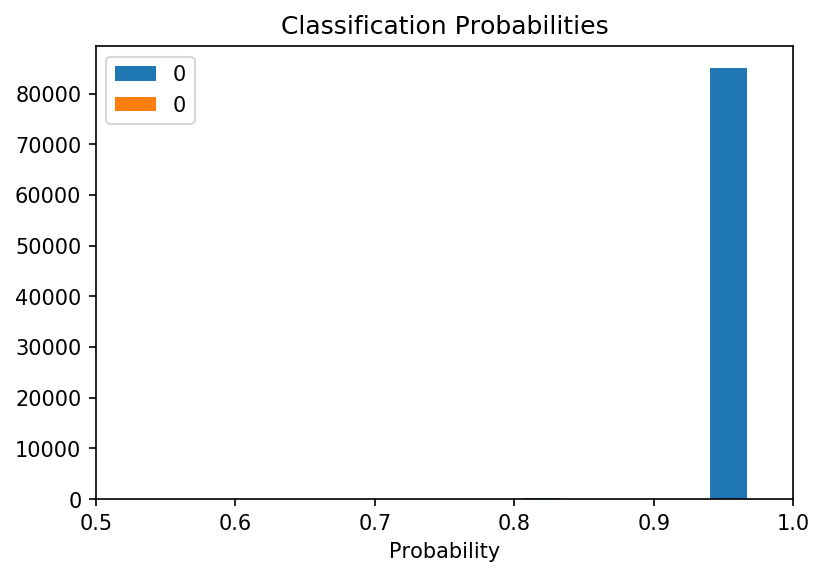

In [52]:
import matplotlib.pyplot as plt
plt.figure(dpi=150)
plt.hist(probas, bins=15)
plt.title('Classification Probabilities')
plt.xlabel('Probability')
#plt.ylabel('# of Instances')
plt.xlim([0.5, 1.0])
plt.legend(y_test)
plt.show()

In [53]:
X_train_std = minmax.fit_transform(X_train)
X_test_std = minmax.transform(X_test)

In [54]:
from sklearn.model_selection import cross_val_score,cross_val_predict

In [55]:
clf_acc = cross_val_score(clf, X_train_std, y_train, cv=5, scoring="accuracy",  n_jobs=-1)

In [56]:
clf_proba = cross_val_predict(clf, X_train_std, y_train, cv=5, method='predict_proba')
clf_scores = clf_proba[:, 1] 

In [58]:
clf_acc

array([0.99952349, 0.99944825, 0.99942317, 0.99939809, 0.99942315])

# Logistic Regression

In [59]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)
lr_acc = cross_val_score(lr, X_train_std, y_train, cv=5, scoring='accuracy', n_jobs=-1)
lr_proba = cross_val_predict(lr, X_train_std, y_train, cv=5, method='predict_proba')
lr_scores = lr_proba[:, 1]

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [60]:
lr_acc

array([0.99879618, 0.99914729, 0.99902189, 0.99902189, 0.99907203])

In [61]:
y_pred=lr.predict(X_test)

In [62]:
from sklearn.metrics import accuracy_score, recall_score, roc_auc_score, confusion_matrix

print("\nAccuracy score: %f" %(accuracy_score(y_test,y_pred) * 100))
print("Recall score : %f" %(recall_score(y_test, y_pred) * 100))
print("ROC score : %f\n" %(roc_auc_score(y_test, y_pred) * 100))
print(confusion_matrix(y_test, y_pred))


Accuracy score: 99.893496
Recall score : 68.456376
ROC score : 84.202395

[[85250    44]
 [   47   102]]


# Naive Bayes

In [63]:
from sklearn.naive_bayes import GaussianNB
nb_classfier =GaussianNB()
nb_classfier.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [65]:
nb_y_test = nb_classfier.predict(X_test)#for test
nb_y_test

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [66]:
nb_y_train=nb_classfier.predict(X_train)#for train
nb_y_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [67]:
from sklearn.metrics import confusion_matrix
nb_cm_test = confusion_matrix(y_test,nb_y_test)
nb_cm_test

array([[84765,   529],
       [   47,   102]], dtype=int64)

In [68]:
from sklearn.metrics import accuracy_score
nb_acc_test=accuracy_score(y_test, nb_y_test)
nb_acc_test

0.9932586636705172

In [69]:
nb_acc_train=accuracy_score(y_train, nb_y_train)  #train  
nb_acc_train

0.9929325254308702

In [70]:
from sklearn.metrics import precision_score

nb_precision_test =precision_score(y_test, nb_y_test, average='weighted')  
print(nb_precision_test)
nb_precision_train =precision_score(y_train, nb_y_train, average='weighted')
print(nb_precision_train)

0.9979848374942225
0.9979044221045538


#  support vector classification

In [71]:
from sklearn.svm import SVC
sc = SVC(kernel='rbf')
sc_classifier = sc.fit(X_train,y_train) 

In [72]:
svc_y_test = sc_classifier.predict(X_test)
print(svc_y_test)

[0 0 0 ... 0 0 0]


In [73]:
svc_y_train=sc_classifier.predict(X_train)  #train
print(svc_y_train)

[0 0 0 ... 0 0 0]


In [74]:
from sklearn.metrics import confusion_matrix
svc_cm_test = confusion_matrix(y_test,svc_y_test)   
svc_cm_test

array([[85294,     0],
       [  149,     0]], dtype=int64)

In [75]:
svc_cm_train =confusion_matrix(y_train, svc_y_train)
svc_cm_train

array([[199021,      0],
       [   343,      0]], dtype=int64)

In [76]:
from sklearn.metrics import accuracy_score
svc_acc_test=accuracy_score(y_test, svc_y_test)  #for test  
svc_acc_test

0.9982561473731025

In [77]:
from sklearn.metrics import precision_score
sv_precision_test= precision_score(y_test, svc_y_test, average='weighted')  
print(sv_precision_test)
sv_precision_train=precision_score(y_train, svc_y_train, average='weighted')
print(sv_precision_train)

0.9965153357681894
0.9965620178246156


C:\Users\hp\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Decision Tree

In [78]:
from sklearn.tree import DecisionTreeClassifier

dtc_clf = DecisionTreeClassifier()
dtc_clf.fit(X_train,y_train)
#Print cross validation score for Decision Tree Calssifier
dtc_clf_acc = cross_val_score(dtc_clf, X_train_std, y_train, cv=5, scoring="accuracy",  n_jobs=-1)
dtc_proba = cross_val_predict(dtc_clf, X_train_std, y_train, cv=5, method='predict_proba')
dtc_clf_scores = dtc_proba[:, 1]

In [79]:
dtc_y_test =dtc_clf.predict(X_test)
dtc_y_test

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [80]:
dtc_y_train = dtc_clf.predict(X_train)
dtc_y_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [81]:
from sklearn.metrics import confusion_matrix
dtc_cm_test = confusion_matrix(y_test, dtc_y_test)
dtc_cm_test

array([[85252,    42],
       [   39,   110]], dtype=int64)

In [82]:
from sklearn.metrics import accuracy_score
dtc_accu_test= accuracy_score(y_test,dtc_y_test)
dtc_accu_test

0.9990519995786665

In [83]:
dtc_accu_train= accuracy_score(y_train,dtc_y_train)    
dtc_accu_train

1.0

In [84]:
from sklearn.metrics import precision_score

dtc_precision_test =precision_score(y_test, dtc_y_test, average='weighted')  
print(dtc_precision_test)
dtc_precision_train =precision_score(y_train, dtc_y_train, average='weighted')
print(dtc_precision_train)

0.9990616852825175
1.0


In [85]:
from sklearn.metrics import recall_score
dtc_recall_test=recall_score(y_test,dtc_y_test, average='weighted' )
print(dtc_recall_test)
dtc_recall_train=recall_score(y_train,dtc_y_train, average='weighted' )
print(dtc_recall_train)

0.9990519995786665
1.0


# Random Forest

In [88]:
from sklearn.ensemble import RandomForestClassifier
rmf = RandomForestClassifier(max_depth=5, random_state=0)
rf_classi = rmf.fit(X_train, y_train)
#Print cross validation score for Random Forest Calssifier
rmf_clf_acc = cross_val_score(rf_classi, X_train_std, y_train, cv=5, scoring="accuracy",  n_jobs=-1)
rmf_proba = cross_val_predict(rf_classi, X_train_std, y_train, cv=5, method='predict_proba')
rmf_clf_scores = rmf_proba[:, 1]

In [87]:
rf_y_test = rf_classi.predict(X_test)
rf_y_test

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [89]:
rf_y_train = rf_classi.predict(X_train)
rf_y_train

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [90]:
from sklearn.metrics import confusion_matrix
rf_cm_test = confusion_matrix(y_test, rf_y_test)
rf_cm_test

array([[85288,     6],
       [   43,   106]], dtype=int64)

In [91]:
rf_cm_train = confusion_matrix(y_train, rf_y_train)
rf_cm_train

array([[199011,     10],
       [    88,    255]], dtype=int64)

In [92]:
from sklearn.metrics import accuracy_score
rf_accu_test= accuracy_score(y_test,rf_y_test)  
rf_accu_test

0.9994265182636377

In [93]:
rf_accu_train= accuracy_score(y_train,rf_y_train)  
rf_accu_train

0.9995084368291166

In [94]:
from sklearn.metrics import precision_score
rf_precision_test =precision_score(y_test, rf_y_test, average='weighted')  
print(rf_precision_test)  #test data
rf_precision_train =precision_score(y_train, rf_y_train, average='weighted')
print(rf_precision_train) #train data

0.9994035380567621
0.9994938458251483
